<a href="https://colab.research.google.com/github/srivatsalnarayan/Global_Cyber_Security/blob/main/Global_Cybersecurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline

In [ ]:
run_locally = False
if run_locally:
    dataset_path = './Cyber_security.csv'
else:
    dataset_path = '/content/drive/MyDrive/Colab Notebooks/Global Cybersecurity/Cyber_security.csv'

df = pd.read_csv(dataset_path)
df.head()

,Country,Region,CEI,GCI,NCSI,DDL
0,Afghanistan,Asia-Pasific,1.000,5.20,11.69,19.50
1,Albania,Europe,0.566,64.32,62.34,48.74
2,Algeria,Africa,0.721,33.95,33.77,42.81
3,Andorra,Europe,NaN,26.38,NaN,NaN
4,Angola,Africa,NaN,12.99,9.09,22.69


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  192 non-null    object 
 1   Region   192 non-null    object 
 2   CEI      108 non-null    float64
 3   GCI      190 non-null    float64
 4   NCSI     167 non-null    float64
 5   DDL      152 non-null    float64
dtypes: float64(4), object(2)
memory usage: 9.1+ KB


In [ ]:
dfg = df['Region'].value_counts().reset_index()
dfg.columns = ['Region', 'Quantity']
fig = px.bar(dfg, x='Region', y='Quantity',
             title='Number of Countries in Report by Region (Continent)',
            color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()

In [ ]:
df.describe()


,CEI,GCI,NCSI,DDL
count,108.000000,190.000000,167.000000,152.000000
mean,0.471861,52.769526,43.306587,51.707829
std,0.217246,34.884013,26.820907,18.283847
min,0.110000,1.350000,1.300000,11.300000
25%,0.279500,18.257500,19.480000,36.532500
50%,0.483000,53.145000,40.260000,51.790000
75%,0.624250,89.187500,64.940000,65.237500
max,1.000000,100.000000,96.100000,82.930000


In [ ]:
fig = make_subplots(rows=2, cols=2, subplot_titles=('<b>Distribution of CEI</b>',
                                                    '<b>Distribution of GCI</b>',
                                                    '<b>Distribution of NCSI</b>',
                                                    '<b>Distribution of DDL</b>'
                                                   ))

fig.add_trace(go.Histogram(x=df['CEI'], nbinsx=30), row=1, col=1)
fig.add_trace(go.Histogram(x=df['GCI']), row=1, col=2)
fig.add_trace(go.Histogram(x=df['NCSI'], nbinsx=30), row=2, col=1)
fig.add_trace(go.Histogram(x=df['DDL'], nbinsx=30), row=2, col=2)


# Update visual layout
fig.update_layout(
    showlegend=False,
    width=600,
    height=400,
    autosize=False,
    margin=dict(t=15, b=0, l=5, r=5),
    template="plotly_white",
)

# update font size at the axes
fig.update_coloraxes(colorbar_tickfont_size=10)
# Update font in the titles: Apparently subplot titles are annotations (Subplot font size is hardcoded to 16pt · Issue #985)
fig.update_annotations(font_size=12)
# Reduce opacity
fig.update_traces(opacity=0.75)

fig.show()

In [ ]:
for col in df.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(df[col].isnull().sum()/df[col].shape[0]))
    print(msg)

column:    Country	 Percent of NaN value: 0.00%
column:     Region	 Percent of NaN value: 0.00%
column:        CEI	 Percent of NaN value: 43.75%
column:        GCI	 Percent of NaN value: 1.04%
column:       NCSI	 Percent of NaN value: 13.02%
column:        DDL	 Percent of NaN value: 20.83%


<Axes: >

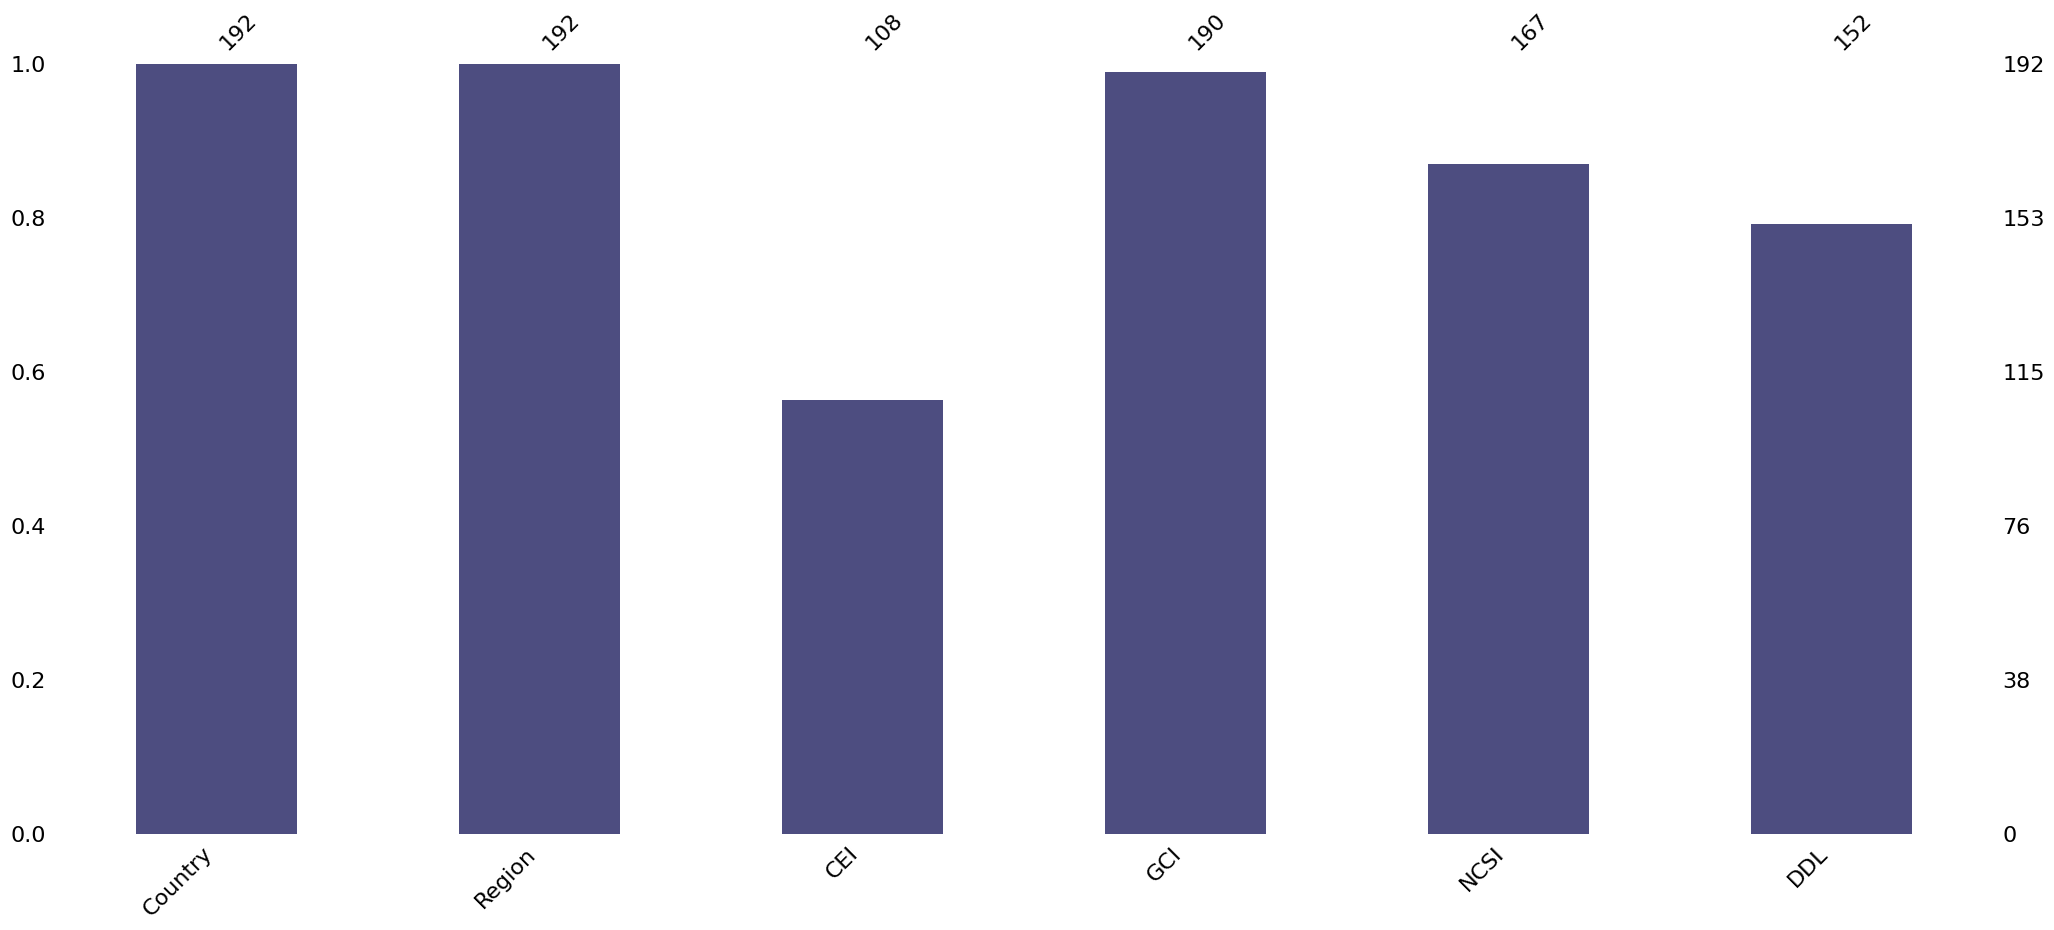

In [ ]:
import missingno as msno

msno.bar(df, color=(0.3,0.3,0.5))

<Axes: >

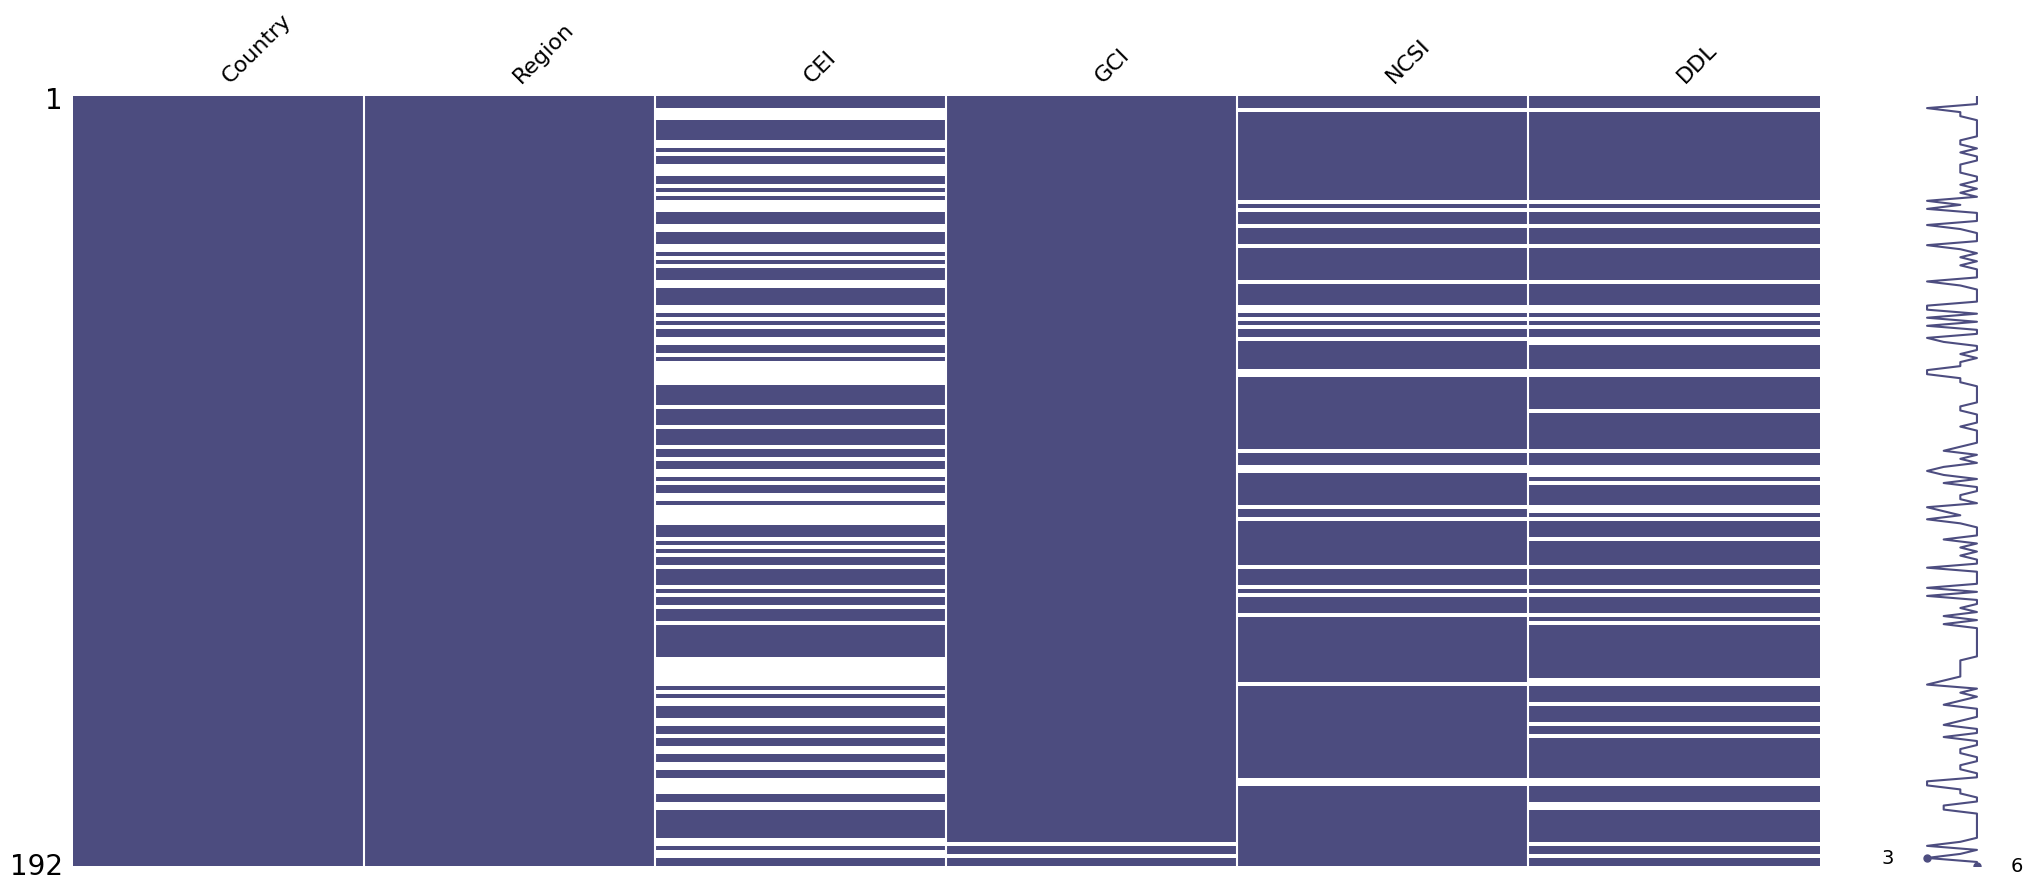

In [ ]:
msno.matrix(df, color=(0.3,0.3,0.5))

In [ ]:
# count the number of NaN values by row

cols = ['CEI', 'GCI', 'NCSI', 'DDL']
df['Number_of_NaNs'] = df[cols].isna().sum(1)

df_nan = df[['Country','Number_of_NaNs']]

In [ ]:
df_nan.sort_values('Number_of_NaNs',
                   ascending=False)[
                        [
                          'Country',
                          'Number_of_NaNs'
                        ]
][:30].style.background_gradient(cmap='seismic')

,Country,Number_of_NaNs
60,Gabon,3
105,Marshall Islands,3
28,Cabo Verde,3
26,Burkina Faso,3
102,Maldives,3
37,Comoros,3
171,Togo,3
170,Timor-Leste,3
117,Nauru,3
146,Sao Tome and Principe,3


In [ ]:
# let's convert df['Number_of_NaNs'] to a category and study the distribution of the countries with poor cybersecurity index
# coverage across the regions
df['Number_of_NaNs'] = df['Number_of_NaNs'].astype('category',copy=False)
agg_data = df[["Region", "Number_of_NaNs"]].groupby(["Region", "Number_of_NaNs"]).size().reset_index(name="Count")

In [ ]:
# define figure element
fig = px.sunburst(
    agg_data,
    values='Count',
    path=["Region", "Number_of_NaNs"],
    title="Number of countries by region and number of cybersecurity indexes missed",
    color="Number_of_NaNs",
    height=600,
    color_discrete_sequence=px.colors.qualitative.Pastel
)
# display the figure
fig.show()

In [ ]:
cei_df = df[['Country','Region', 'CEI']]
# retain only the records with CEI values
cei_df = cei_df[cei_df['CEI'].notna()] # it will remain 108 countries out of 192 listed in the dataset1

In [ ]:
fig = px.violin(df, y="CEI", x="Region", box=True, points="all", title="CEI by Regions", hover_data=df.columns)
fig.show()

In [ ]:
# implement binning by CEI categories

def set_cei_level(x):
    res = "N/A"
    if x >= 0.8:
        res = "1 - Very high"
    elif x >= 0.6 and x < 0.8:
        res = "2 - High"
    elif x >= 0.4 and x < 0.6:
        res = "3 - Moderate"
    elif x >= 0.2 and x < 0.4:
        res = "4 - Low"
    else:
        res = "5 - Very low"
    return res

cei_df["Cybersecurity_exposure"] = cei_df["CEI"].apply(set_cei_level)

agg_data = cei_df.groupby(['Region', 'Cybersecurity_exposure']).size().reset_index(name='Country_count')

fig = px.bar(
    agg_data,
    x='Region',
    y='Country_count',
    color='Cybersecurity_exposure',
    title="Cybersecurity Exposure by Region and Severity Levels",
    height=600)
fig.show()

In [ ]:
# set the size of the geo bubble
def set_cei_size(value):
    '''
    Takes the numeric value of a parameter to visualize on a map (Plotly Geo-Scatter plot)
    Returns a number to indicate the size of a bubble for a country which numeric attribute value
    was supplied as an input
    '''
    # result = np.log(1+value/10)
    result = (value - 0.11) / (value + 70 )
    if result < 0:
        result = 0.001
    return result

cei_df['Size'] = cei_df.apply(lambda x: set_cei_size(x['CEI']), axis=1)

fig = px.scatter_geo(
    cei_df, locations="Country", locationmode='country names',
    color="CEI",
    size='Size', hover_name="Country",
    range_color= [0, 1],
    projection="natural earth",
    title='CEI Index Across the Globe',
    color_continuous_scale="portland")

# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=40, b=0, l=5, r=5),
    template="plotly_white",
)

fig.show()

In [ ]:
cei_df.sort_values('CEI',
                   ascending=True)[
                        [
                          'Country',
                          'CEI'
                        ]
][:10].style.background_gradient(cmap='seismic')

,Country,CEI
58,Finland,0.110000
45,Denmark,0.117000
98,Luxembourg,0.124000
8,Australia,0.131000
126,Norway,0.134000
54,Estonia,0.134000
83,Japan,0.138000
182,United States,0.145000
9,Austria,0.162000
165,Switzerland,0.172000


In [ ]:
gci_df = df[['Country','Region', 'GCI']]
# retain only the records with GCI values
gci_df = gci_df[gci_df['GCI'].notna()]

fig = px.violin(df, y="GCI", x="Region", box=True, points="all", title="GCI by Regions", hover_data=df.columns)
fig.show()

In [ ]:
def set_gci_level(x):
    res = "N/A"
    if x >= 80:
        res = "1 - Very high"
    elif x >= 60 and x < 80:
        res = "2 - High"
    elif x >= 40 and x < 60:
        res = "3 - Moderate"
    elif x >= 20 and x < 40:
        res = "4 - Low"
    else:
        res = "5 - Very low"
    return res

gci_df["Cybersecurity_level"] = gci_df["GCI"].apply(set_gci_level)

agg_data = gci_df.groupby(['Region', 'Cybersecurity_level']).size().reset_index(name='Country_count')

fig = px.bar(
    agg_data,
    x='Region',
    y='Country_count',
    color='Cybersecurity_level',
    title="Cybersecurity Exposure by Region (based on GCI score)",
    height=600)
fig.show()

In [ ]:
# set the size of the geo bubble
def set_gci_size(value):
    '''
    Takes the numeric value of a parameter to visualize on a map (Plotly Geo-Scatter plot)
    Returns a number to indicate the size of a bubble for a country which numeric attribute value
    was supplied as an input
    '''
    result = np.log(1+value/1200)

    if result < 0:
        result = 0.001
    return result

gci_df['Size'] = gci_df.apply(lambda x: set_gci_size(x['GCI']), axis=1)

fig = px.scatter_geo(
    gci_df, locations="Country", locationmode='country names',
    color="GCI",
    size='Size', hover_name="Country",
    range_color= [0, 100],
    projection="natural earth",
    title='GCI Index Across the Globe',
    color_continuous_scale="portland_r")

# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=40, b=0, l=5, r=5),
    template="plotly_white",
)

fig.show()

In [ ]:
gci_df.sort_values('GCI',
                   ascending=False)[
                        [
                          'Country',
                          'GCI'
                        ]
][:10].style.background_gradient(cmap='seismic')

,Country,GCI
182,United States,100.000000
147,Saudi Arabia,99.540000
181,United Kingdom,99.540000
54,Estonia,99.480000
160,Spain,98.520000
152,Singapore,98.520000
158,South Korea,98.520000
101,Malaysia,98.060000
139,Russia,98.060000
180,United Arab Emirates,98.060000


In [ ]:
ncsi_df = df[['Country','Region', 'NCSI']]
# retain only the records with GCI values
ncsi_df = ncsi_df[ncsi_df['NCSI'].notna()]

fig = px.violin(df, y="NCSI", x="Region", box=True, points="all", title="NCSI by Regions", hover_data=df.columns)
fig.show()

In [ ]:
# set the size of the geo bubble
def set_ncsi_size(value):
    '''
    Takes the numeric value of a parameter to visualize on a map (Plotly Geo-Scatter plot)
    Returns a number to indicate the size of a bubble for a country which numeric attribute value
    was supplied as an input
    '''
    result = np.log(1+value/1200)

    if result < 0:
        result = 0.001
    return result

ncsi_df['Size'] = ncsi_df.apply(lambda x: set_ncsi_size(x['NCSI']), axis=1)

fig = px.scatter_geo(
    ncsi_df, locations="Country", locationmode='country names',
    color="NCSI",
    size='Size', hover_name="Country",
    range_color= [0, 98],
    projection="natural earth",
    title='NCSI Index Across the Globe',
    color_continuous_scale="portland_r")

# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=40, b=0, l=5, r=5),
    template="plotly_white",
)

fig.show()

In [ ]:
ncsi_df.sort_values('NCSI',
                   ascending=False)[
                        [
                          'Country',
                          'NCSI'
                        ]
][:10].style.background_gradient(cmap='seismic')

,Country,NCSI
65,Greece,96.100000
16,Belgium,94.810000
97,Lithuania,93.510000
54,Estonia,93.510000
44,Czech Republic,92.210000
63,Germany,90.910000
138,Romania,89.610000
136,Portugal,89.610000
181,United Kingdom,89.610000
160,Spain,88.310000


In [ ]:
ddl_df = df[['Country','Region', 'DDL']]
# retain only the records with DDL values
ddl_df = ddl_df[ddl_df['DDL'].notna()]

fig = px.violin(df, y="DDL", x="Region", box=True, points="all", title="DDL by Regions", hover_data=df.columns)
fig.show()

In [ ]:
# set the size of the geo bubble
def set_ddl_size(value):
    '''
    Takes the numeric value of a parameter to visualize on a map (Plotly Geo-Scatter plot)
    Returns a number to indicate the size of a bubble for a country which numeric attribute value
    was supplied as an input
    '''
    result = np.log(1+value/1200)

    if result < 0:
        result = 0.001
    return result

ddl_df['Size'] = ddl_df.apply(lambda x: set_ddl_size(x['DDL']), axis=1)

fig = px.scatter_geo(
    ddl_df, locations="Country", locationmode='country names',
    color="DDL",
    size='Size', hover_name="Country",
    range_color= [10, 85],
    projection="natural earth",
    title='DDL Index Across the Globe',
    color_continuous_scale="portland_r")

# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=40, b=0, l=5, r=5),
    template="plotly_white",
)

fig.show()

In [ ]:
ddl_df.sort_values('DDL',
                   ascending=False)[
                        [
                          'Country',
                          'DDL'
                        ]
][:10].style.background_gradient(cmap='seismic')

,Country,DDL
165,Switzerland,82.930000
45,Denmark,82.680000
119,Netherlands,81.860000
164,Sweden,81.510000
41,Croatia,81.510000
182,United States,81.050000
126,Norway,80.190000
63,Germany,80.010000
181,United Kingdom,79.960000
152,Singapore,79.930000


In [ ]:
fig = px.scatter_3d(df, x='Region', y='CEI', z='GCI', color='DDL', hover_name="Country",
                   title='CEI-GCI-DDL Inter-relations')
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=35, b=35, l=5, r=5),
    template="plotly_white",
)
fig.show()

In [ ]:
fig = px.scatter_3d(df, x='Region', y='CEI', z='NCSI', color='DDL', hover_name="Country",
                   title='CEI-GCI-DDL Inter-relations')
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=35, b=35, l=5, r=5),
    template="plotly_white",
)
fig.show()